# **Mounting the dataset from google drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Importiong Deep Learning Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
import os
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.applications import MobileNetV3Large ,MobileNetV2
import matplotlib.pyplot as plt
import random, cv2
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint

# **Pre-processing the datset**

In [ ]:
#Image augemntation by adjusting the contrast of an image, rescaling, and horizontal. 
def preprocesser(image):
    image= tf.image.adjust_contrast(image, 0.9)
    #image = tfa.image.equalize(image)
    #image = cv2.addWeighted(image,4, cv2.GaussianBlur(image , (0,0) , 32) ,-4 ,120) 
    #image = tf.image.central_crop(image, 0.2)
    #image = tf.image.resize(image, [224,224])

    #image = tf.image.rgb_to_grayscale(image)
   
    return image

In [ ]:
PREPROCESSING_FUNC = preprocesser

train = ImageDataGenerator(preprocessing_function = PREPROCESSING_FUNC,rescale=1.0/255.0, horizontal_flip=True
)

validation = ImageDataGenerator(preprocessing_function = PREPROCESSING_FUNC, rescale=1./255.0, horizontal_flip=True)



In [ ]:
#Creating two folders one for training and the other for validation
train_dataset= train.flow_from_directory('//content/drive/MyDrive/Second/data/training', 
                                         target_size= (224, 224),
                                         class_mode= 'categorical'
                                         )

validation_dataset= validation.flow_from_directory('/content/drive/MyDrive/Second/data/testing', 
                                                    target_size= (224, 224),
                                                                class_mode= 'categorical')
 

Found 3000 images belonging to 5 classes.
Found 662 images belonging to 5 classes.


# **Sample image plot from the afater pre-processing the dataset**

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


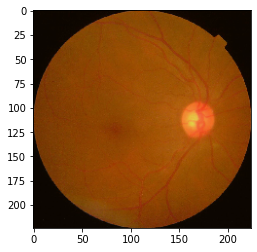

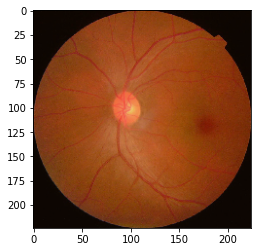

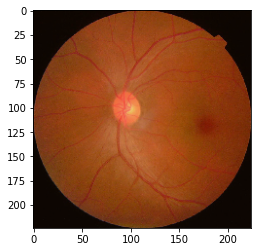

In [ ]:
# what the inputs/images look like after augmentation
for i in range (0,3):
    random_num = random.randint(0,26)
    image = train_dataset[random_num]
 
  
    plt.figure()
    print(image[1][0])
    plt.imshow(image[0][0])

   

# **Bulding the model**

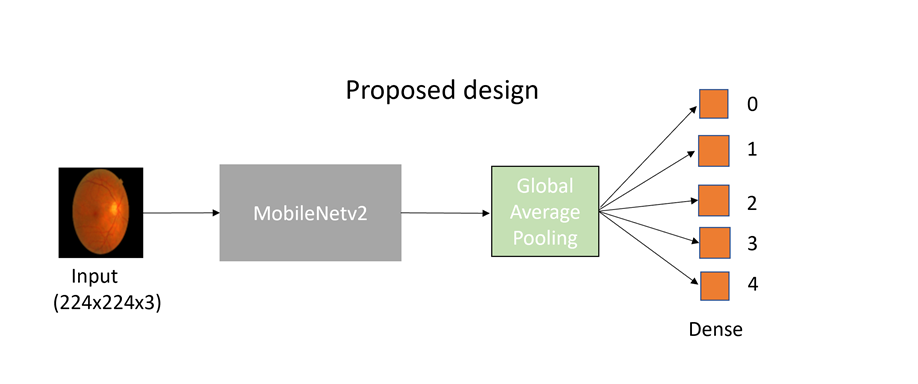

In [ ]:
#Using mobileNetV2 as our pre-trained networks
model = MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)
#Global average pooling
x = GlobalAveragePooling2D()(model.output)
#fully connected layer with dense 5 for DR classification
y = Flatten()(x)
outputs = Dense(5,
                    activation='softmax'
                   )(y)
model = Model(inputs = model.input, outputs = outputs)


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

#  **Setting learning rate and loss function**

In [ ]:
model.compile(optimizer= Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

for layer in model.layers[:-8]: # originally 
    layer.trainable = False # should be False on first run


# **Model check point**

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Second/Trained_Models/MobilenetV3_first_try.h5",monitor="val_loss",mode="min",save_best_only=True, verbose=1)
             

# we put our call backs into a callback list
callbacks = [checkpoint]

In [ ]:
#Freezing the last 8 layers
for layer in model.layers[:-8]: # originally 
    layer.trainable = False # should be False on first run

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# **Training the model**

In [ ]:
ToPlot = model.fit(train_dataset, 
                   validation_data= validation_dataset, 
                               callbacks = callbacks,
                   verbose=1, 
                   epochs = 50,  
                  )

Epoch 1/50
94/94 [==============================] - 414s 4s/step - loss: 0.6998 - accuracy: 0.7810 - val_loss: 1.9257 - val_accuracy: 0.6299

Epoch 00001: val_loss improved from inf to 1.92568, saving model to /content/drive/MyDrive/Second/Trained_Models/MobilenetV3_first_try.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
94/94 [==============================] - 410s 4s/step - loss: 0.5232 - accuracy: 0.8217 - val_loss: 1.6404 - val_accuracy: 0.6677

Epoch 00002: val_loss improved from 1.92568 to 1.64038, saving model to /content/drive/MyDrive/Second/Trained_Models/MobilenetV3_first_try.h5
Epoch 3/50
94/94 [==============================] - 413s 4s/step - loss: 0.4668 - accuracy: 0.8367 - val_loss: 1.4764 - val_accuracy: 0.6767

Epoch 00003: val_loss improved from 1.64038 to 1.47636, saving model to /content/drive/MyDrive/Second/Trained_Models/MobilenetV3_first_try.h5
Epoch 4/50
94/94 [==============================] - 411s 4s/step - loss: 0.4446 - accuracy: 0.8447 - val_loss: 1.3313 - val_accuracy: 0.6858

Epoch 00004: val_loss improved from 1.47636 to 1.33125, saving model to /content/drive/MyDrive/Second/Trained_Models/MobilenetV3_first_try.h5
Epoch 5/50
94/94 [==============================] - 412s 4s/step - loss: 0.4067 - accuracy: 0.8537 - val_loss: 1.2578 - val_accuracy: 0.6873

Epoch 

# **Plotting Loss and Accuracy**

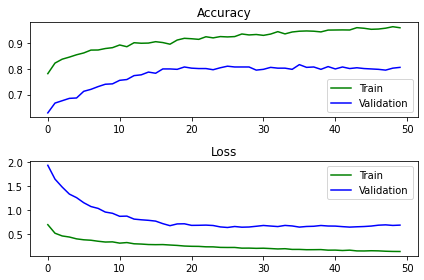

In [ ]:

# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(ToPlot.history["accuracy"], color="g", label="Train")
plt.plot(ToPlot.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(ToPlot.history["loss"], color="g", label="Train")
plt.plot(ToPlot.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = ToPlot.history["accuracy"]
valid_accuracy = ToPlot.history["val_accuracy"]

train_err = ToPlot.history["loss"]
valid_err = ToPlot.history["val_loss"]

# **Converting the model to lightweighted model for mobile app**

In [ ]:
# Convert to TensorFlow Lite model.
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr67cxcns/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


8884376